In this part we filter our data and draw graphs.

In [57]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from kneed import KneeLocator
from collections import Counter

In [58]:
df = pd.read_csv('final_df.csv', index_col='Unnamed: 0')
df

,ПАШАЕВ,ХАНСЕН,ТОРРЕМБИНИ,ВОЛОДИН,КОЛМАКОВ,ГЕЙТС,РЯЙККЕНЕН,МАГОМЕДОВ,ПАСКИНА,ТРЕГУЛОВА,...,КЛЫЧКОВ,МАНИЛОВА,ЦВЕЙГ,ДАВОЯН,СИЗОВ,ТЮКЕЕВ,МОРДВИЧЕВ,ДАНИЛОВ,ОСОВЦОВ,СОБОЛЬ
ПАШАЕВ,180,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ХАНСЕН,0,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ТОРРЕМБИНИ,0,0,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ВОЛОДИН,0,0,0,180,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
КОЛМАКОВ,0,0,0,0,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ТЮКЕЕВ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,0,0,0,0
МОРДВИЧЕВ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,0,0,0
ДАНИЛОВ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,72,0,0
ОСОВЦОВ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18,0


<Axes: >

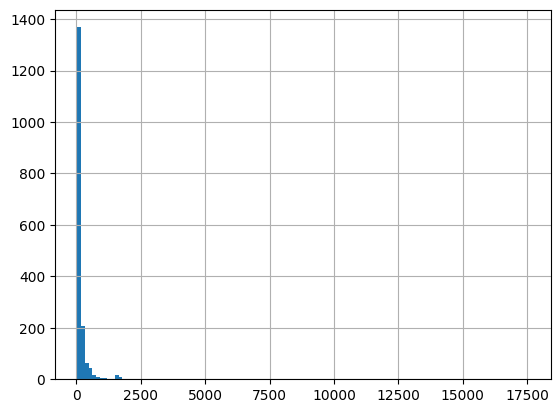

In [59]:
ddd = df.copy()
ddd['cnt'] = 0
for row in list(ddd.index):
    ddd.loc[row, 'cnt'] = sum(ddd.loc[row, :])

ddd.cnt.hist(bins=120)

In [60]:
cnt = Counter()
x = np.array(list(Counter(ddd.cnt.to_list()).keys()))
y = np.array(list(Counter(ddd.cnt.to_list()).values()))

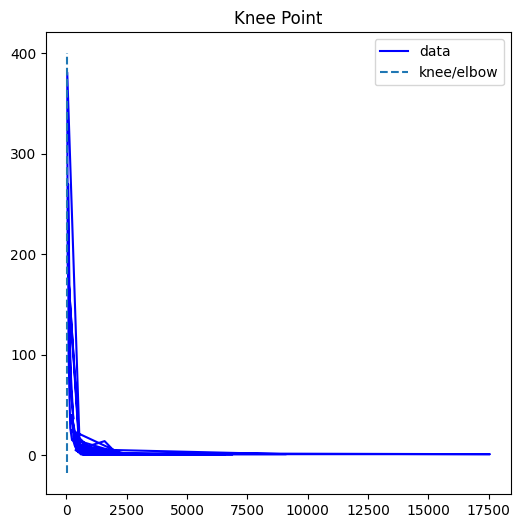

In [61]:
kn = KneeLocator(x, y)
kn.plot_knee()

In [62]:
kn.knee

36

In [63]:
# несмотря на предложенное алгоритмом значение излома в 36, мы отфильтруем больше данных, чтобы оставить наиболее крупные ноды
to_drop_list = ddd[ddd.cnt<300].index.to_list()
ddd.drop(columns=['cnt'], inplace=True)

for col in ddd.columns.to_list():
    if col in to_drop_list:
        ddd.drop(columns=[col], inplace=True)
        ddd.drop([col], inplace=True)

In [64]:
ddd

,ПАШАЕВ,ВОЛОДИН,АБРАМЧЕНКО,МАГНИТСКИЙ,ШУВАЛОВ,ФРИДМАН,НОВАК,МОСКАЛЬКОВА,ГЛАДКОВ,КРАВЧЕНКО,...,КЛЕВЕРЛИ,ПЕТРИЙЧУК,ШАИНСКИЙ,ХАСИКОВ,БАБАЯН,ПРОКОПЬЕВА,КИРИЕНКО,НАВАЛЬНЫЙ,КЛЫЧКОВ,СОБОЛЬ
ПАШАЕВ,180,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ВОЛОДИН,0,180,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
АБРАМЧЕНКО,0,0,72,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
МАГНИТСКИЙ,0,0,0,306,0,0,0,0,0,0,...,0,0,0,0,0,72,0,0,0,0
ШУВАЛОВ,0,0,0,0,72,0,0,0,0,0,...,0,0,0,0,36,0,36,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ПРОКОПЬЕВА,0,0,0,72,0,0,0,0,0,0,...,0,0,0,0,0,108,0,0,0,0
КИРИЕНКО,0,0,0,0,36,0,0,0,0,0,...,0,0,0,0,36,0,90,0,0,0
НАВАЛЬНЫЙ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1242,0,72
КЛЫЧКОВ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,18,0,0,0,0,18,0


In [65]:
# и здесь же избавимся от one-to-one ребер, так как они не несут смысловой нагрузки для нашего исследования
for i in ddd.columns.to_list():
    ddd.loc[i, i]=0

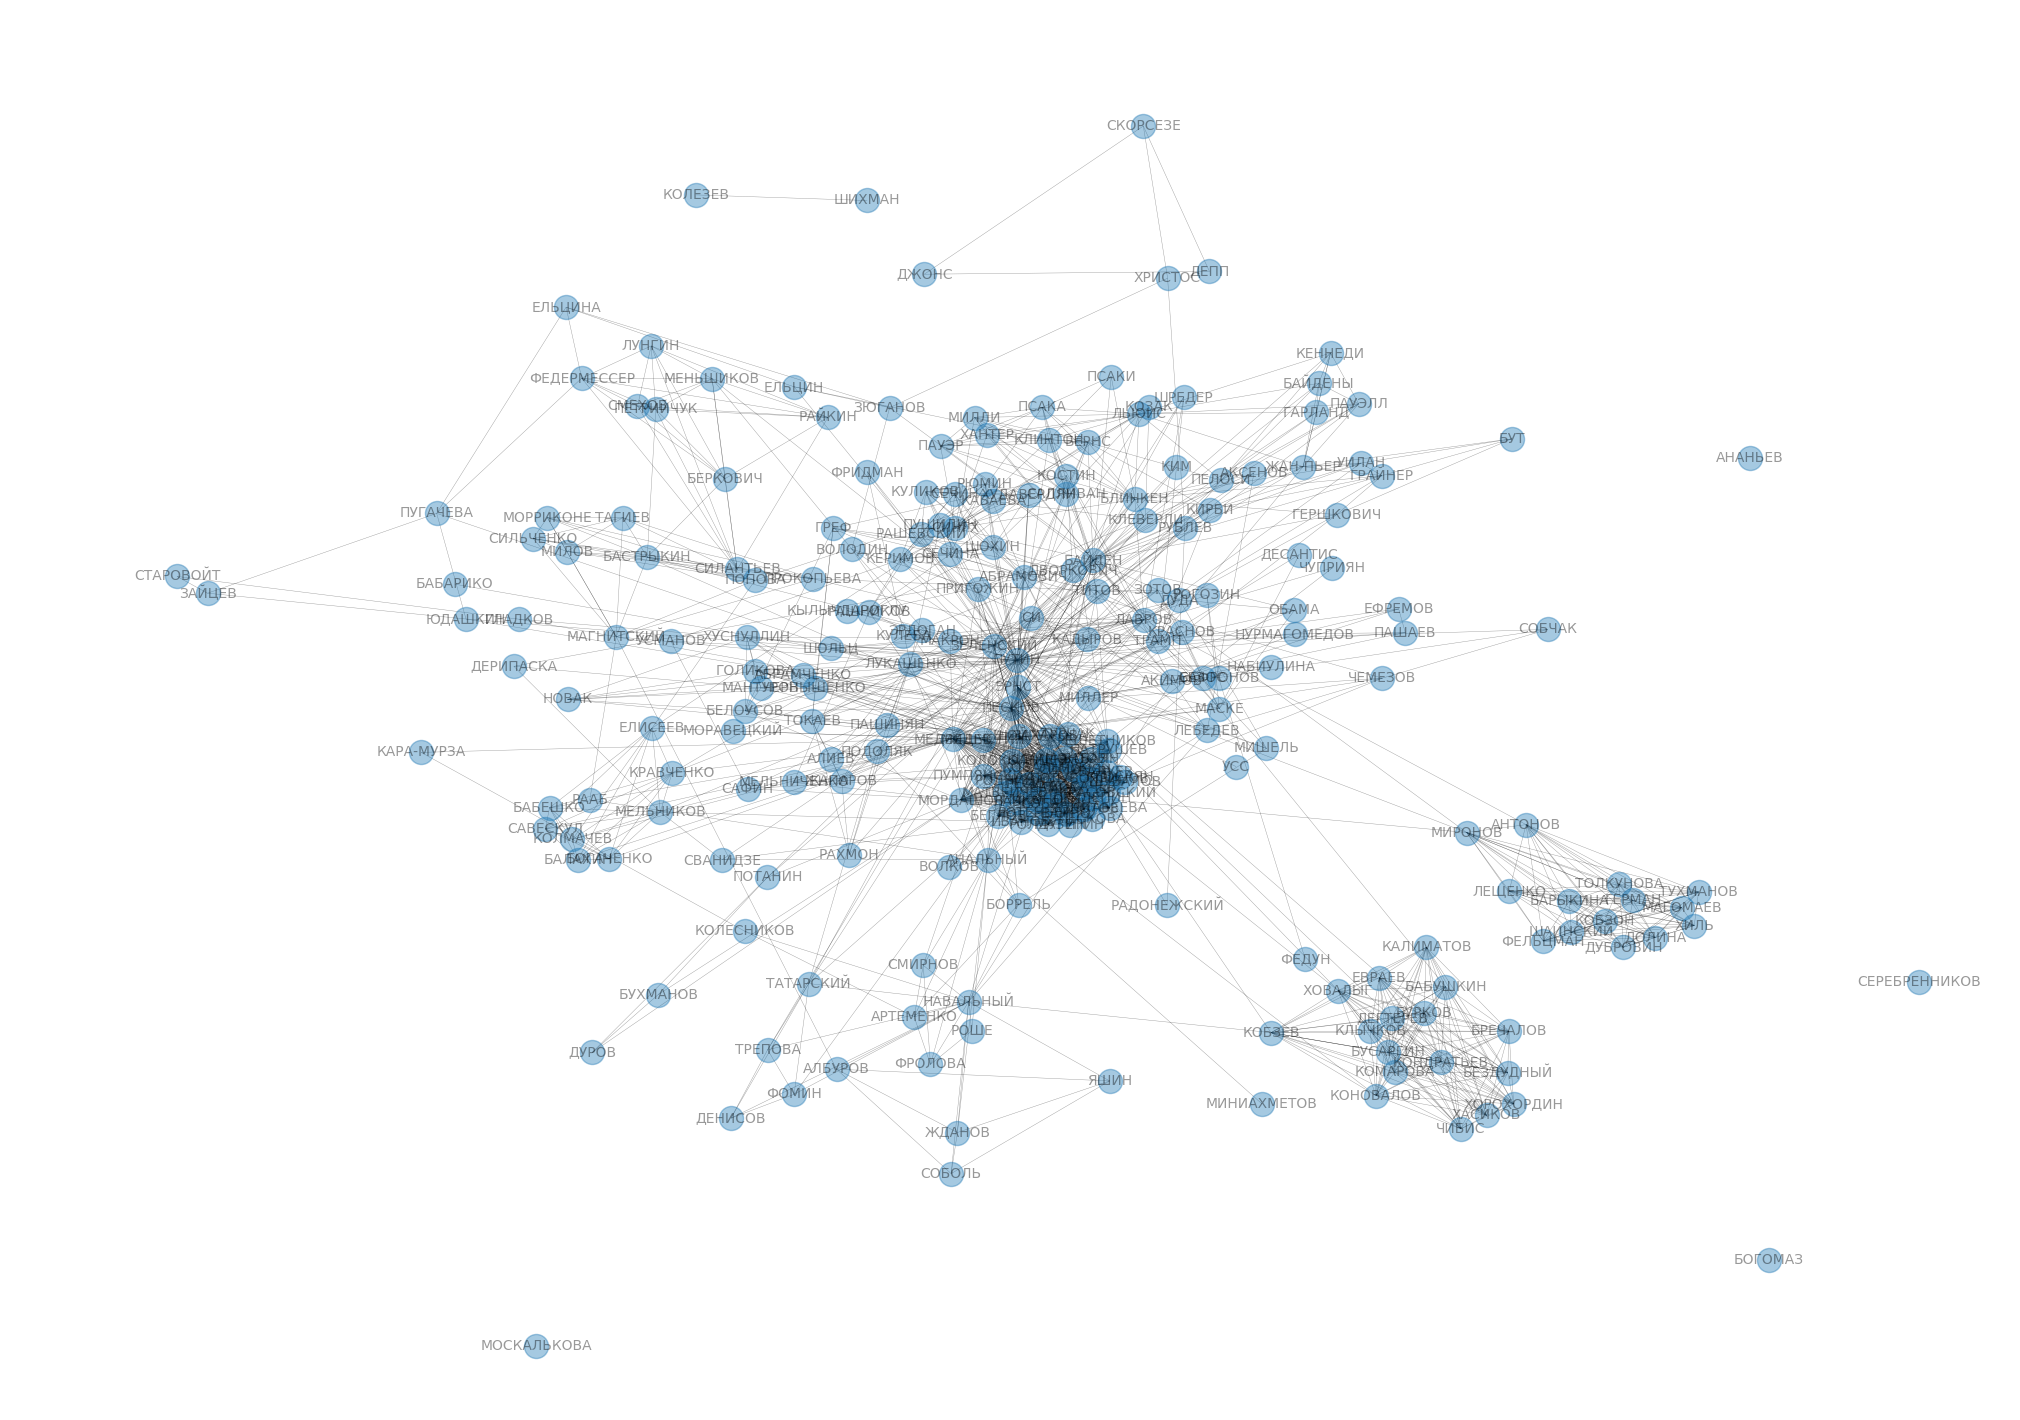

In [68]:
G = nx.Graph(ddd)
plt.figure(figsize=(20,14))
nx.draw(G, pos=nx.spring_layout(G, k=0.5, iterations=25), with_labels=True, alpha=0.4, arrows=False, node_size=300, font_size = 10, width=.3)

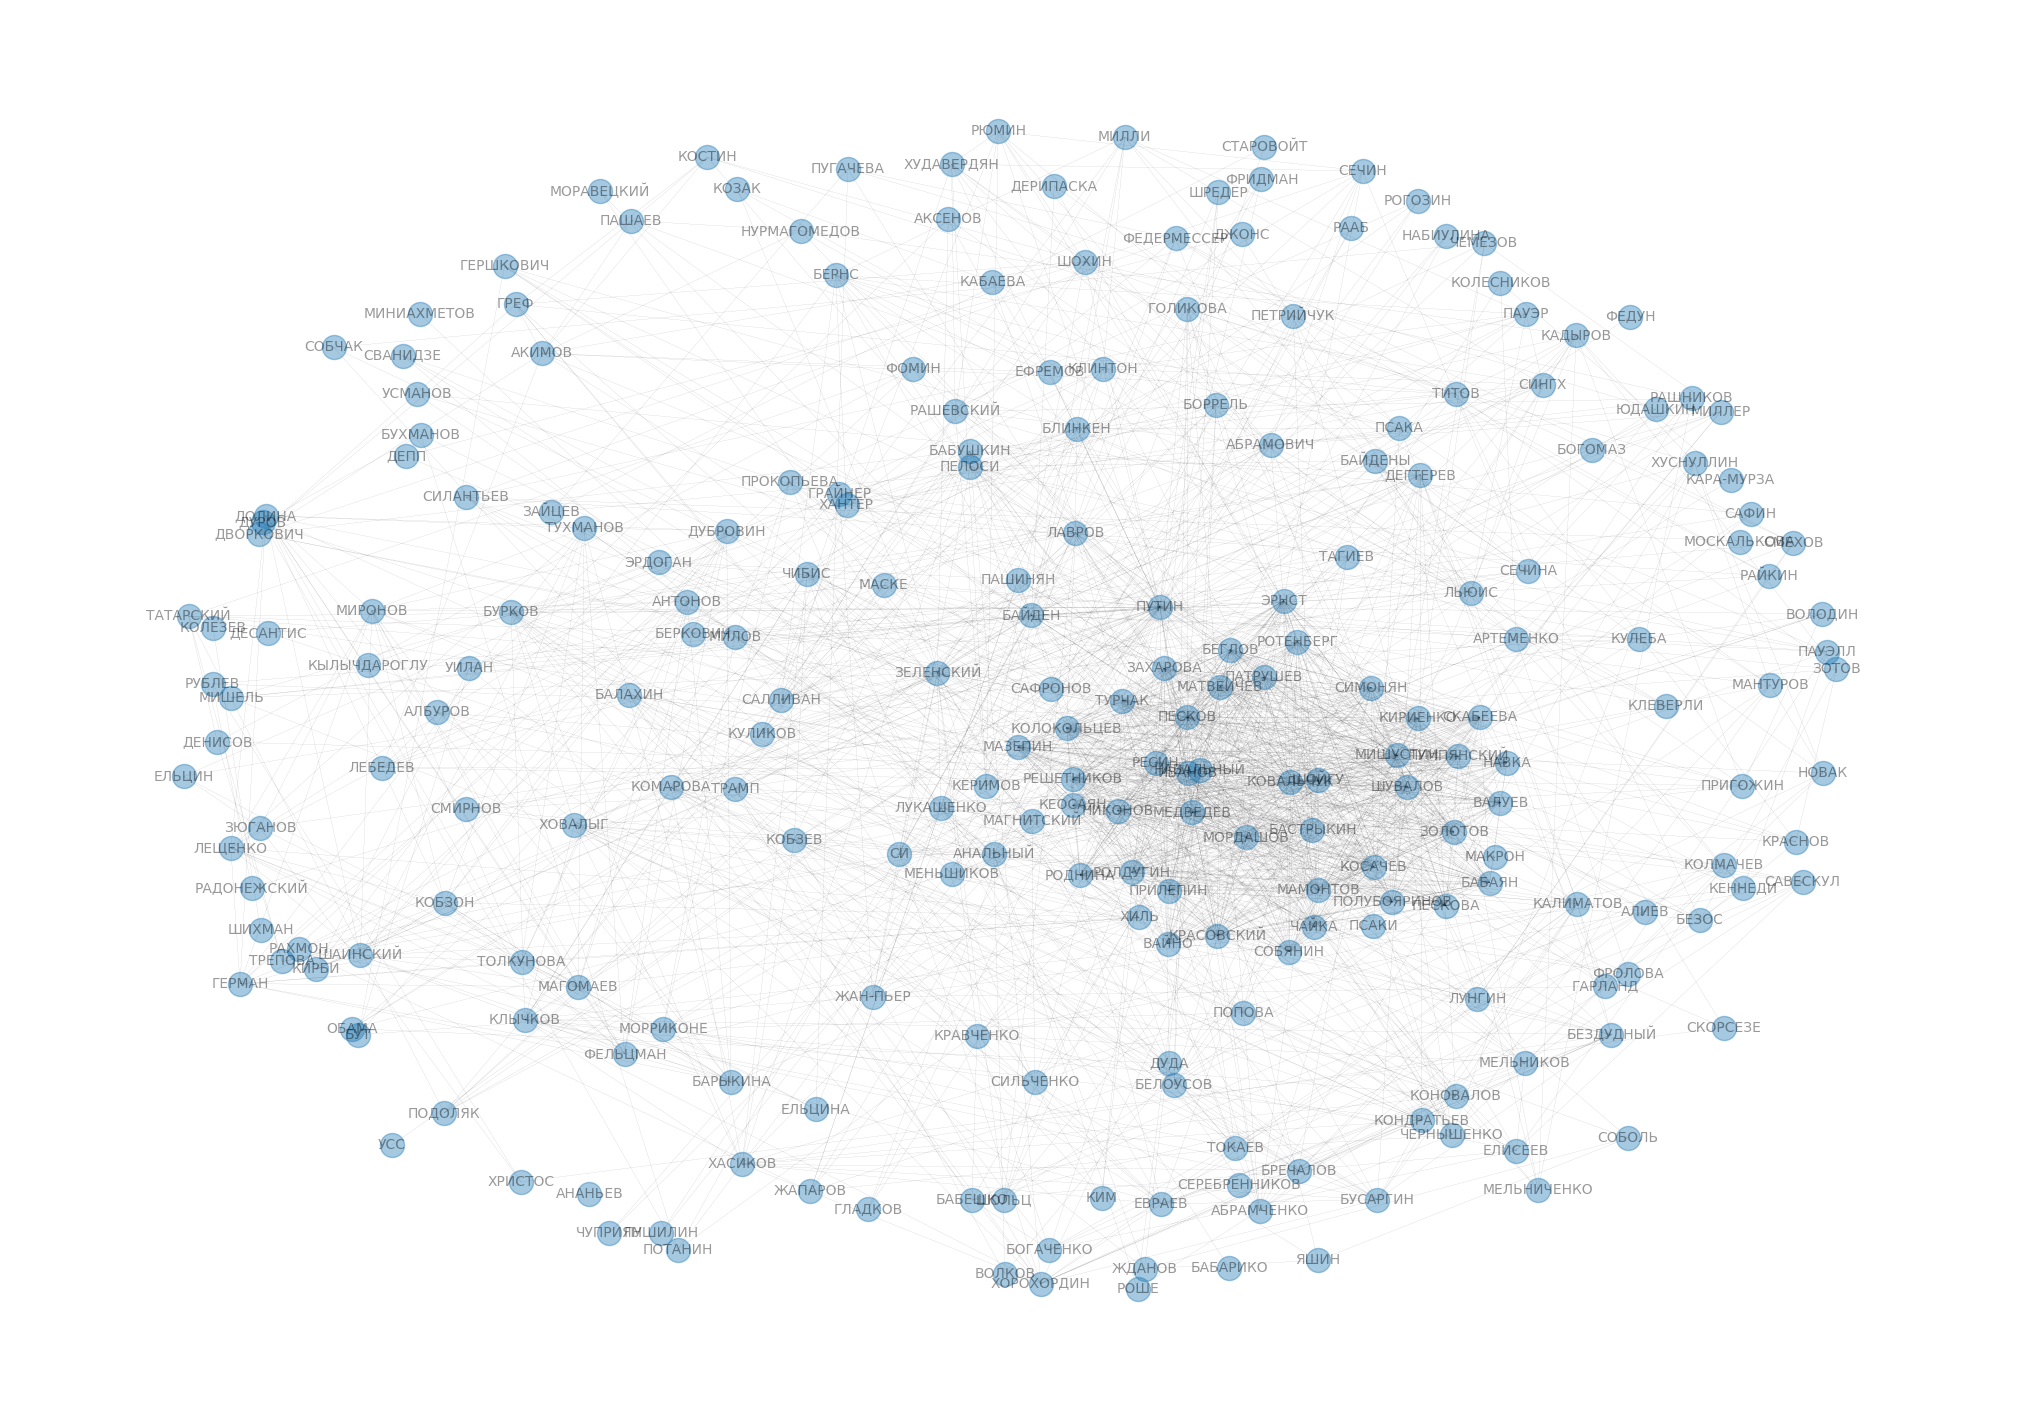

In [70]:
# теперь зафиксируем одну из фигур
G = nx.Graph(ddd)
plt.figure(figsize=(20,14))
nx.draw(G, pos=nx.spring_layout(G, k=3, iterations=45,
                                pos={'ПУТИН':(1,1)}, fixed = ['ПУТИН']), with_labels=True, alpha=0.4, arrows=False, node_size=300, font_size = 10, width=.1)